![Algoritmo1](img/ALG1.png)

In [2]:
# 1)
def bisseccao(f, a, b, epsilon):
    stats = {
        'operacoes': 0,     
        'decisoes': 0,
        'f_eval_total': 0,   
        'f_eval_por_iter': 0 
    }
    
    # 2)
    stats['operacoes'] += 1
    stats['decisoes'] += 1 
    if (b - a) < epsilon:
        x_bar = (a + b) / 2
        stats['operacoes'] += 2
        erro = b - a
        return x_bar, stats, 0, erro
    # 3)
    k = 1

    # 4)
    m = f(a)
    stats['f_eval_total'] += 1


    while True:
        # 5)
        x_old = x if 'x' in locals() else (a + b) / 2
        x = (a + b) / 2
        stats['operacoes'] += 2 

        val_f_x = f(x)
        stats['f_eval_total'] += 1
        

        # 6)
        stats['operacoes'] += 1
        stats['decisoes'] += 1
        if m * val_f_x > 0:
            a = x
            m = val_f_x
        # 7)
        else:
            b = x

        # 8)
        stats['operacoes'] += 1
        stats['decisoes'] += 1
        if (b - a) < epsilon:
            x_bar = (a + b) / 2
            stats['operacoes'] += 2
            stats['f_eval_por_iter'] = stats['f_eval_total'] / k
            erro = abs(x - x_old)
            return x_bar, stats, k, erro

        # 9)
        k = k + 1
        stats['operacoes'] += 1


![Algoritmo2](img/ALG2.png)

In [3]:
# 1)
def posicao_falsa(f, a, b, eps1, eps2):
    stats = {
        'operacoes': 0,     
        'decisoes': 0,
        'f_eval_total': 0,   
        'f_eval_por_iter': 0 
    }
    
    # 2)
    stats['operacoes'] += 1 # 
    stats['decisoes'] += 1 

    if (b - a) < eps1:
        x_bar = (a + b) / 2
        stats['operacoes'] += 2
        erro = b - a
        return x_bar, stats, 0, erro
    
    # 3)
    k = 0
    
    while True:
        # 4)
        m = f(a)
        stats['f_eval_total'] += 1

        
        # 5)
        fa = f(a)
        fb = f(b)
        stats['f_eval_total'] += 2
        
        x = b - (fb * (a - b)) / (fa - fb)
        stats['operacoes'] += 5

        fx = f(x)
        stats['f_eval_total'] += 1
        stats['operacoes'] += 1 


        # 6)
        stats['decisoes'] += 1 
        if abs(fx) < eps2:
            x_bar = x

            if k > 0: stats['f_eval_por_iter'] = stats['f_eval_total'] / k
            erro = b - a
            return x_bar, stats, k, erro
        
        # 7) if M * f(x) > 0
        
        stats['operacoes'] += 1 
        stats['decisoes'] += 1
        if m * fx > 0:
            a = x
        # 8)
        else:
            b = x
        
        # 9)
        stats['operacoes'] += 1
        stats['decisoes'] += 1 
        if (b - a) < eps1:
            x_bar = (a + b) / 2
            stats['operacoes'] += 2
            if k > 0: stats['f_eval_por_iter'] = stats['f_eval_total'] / k
            erro = b - a
            return x_bar, stats, k, erro

        # 10)
        k = k + 1
        stats['operacoes'] += 1


![Algoritmo3](img/ALG3.png)

In [4]:
# 1)
def metodo_ponto_fixo(f, phi, x0, eps1, eps2):
    stats = {
        'operacoes': 0,     
        'decisoes': 0,
        'f_eval_total': 0,   
        'f_eval_por_iter': 0 
    }
    
    # 2)
    stats['operacoes'] += 1
    stats['decisoes'] += 1 
    if abs(f(x0)) < eps1:
        stats['f_eval_total'] += 1
        return x0, stats, 0, 0.0
    
    # 3)
    k = 1
    
    while True:
        # 4)
        x1 = phi(x0)
        stats['f_eval_total'] += 1

        # 5)
        erro = abs(x1 - x0)
        stats['decisoes'] += 1
        if abs(f(x1)) < eps1 or abs(x1 - x0) < eps2:
            stats['f_eval_total'] += 1
            stats['operacoes'] += 2
            stats['decisoes'] += 1 
            if k > 0: stats['f_eval_por_iter'] = stats['f_eval_total'] / k
            x = x1
            return x, stats, k, erro

        # 6)
        x0 = x1

        # 7)
        stats['operacoes'] += 1
        k = k + 1


![Algoritmo4](img/ALG4.png)

In [5]:
# 1)
def metodo_newton(f, df, x0, eps1, eps2):
    stats = {
        'operacoes': 0,
        'decisoes': 0,
        'f_eval_total': 0,
        'f_eval_por_iter': 0
    }

    
    fx0 = f(x0)
    stats['f_eval_total'] += 1

    # 2)
    stats['operacoes'] += 1
    stats['decisoes'] += 1
    erro = 0.0
    if abs(fx0) < eps1:
        return x0, stats, 0, erro

    # 3)
    k = 1

    while True:
        dfx0 = df(x0)
        stats['f_eval_total'] += 1

        # 4)
        x1 = x0 - fx0 / dfx0
        stats['operacoes'] += 2

        fx1 = f(x1)
        stats['f_eval_total'] += 1

        # 5)
        stats['decisoes'] += 1
        erro = abs(x1 - x0)
        if abs(fx1) < eps1 or abs(x1 - x0) < eps2:
            stats['operacoes'] += 2
            stats['decisoes'] += 1
            stats['f_eval_por_iter'] = stats['f_eval_total'] / k
            
            x = x1

            return x, stats, k, erro

        # 6)
        x0 = x1
        fx0 = fx1

        # 7)
        stats['operacoes'] += 1
        k += 1


![Algoritmo5](img/ALG5.png)

In [6]:
# 1)
def secante(f, x0, x1, eps1, eps2):
    stats = {
        'operacoes': 0,
        'decisoes': 0,
        'f_eval_total': 0,
        'f_eval_por_iter': 0
    }

    # 2)
    if abs(f(x0)) < eps1:
        stats['f_eval_total'] += 1
        x = x0
        erro = 0.0
        return x, stats, 0, erro
    
    # 3)
    erro_inicial = abs(x1 - x0)
    if abs(f(x1)) < eps1 or abs(x1 - x0) < eps2:
        stats['f_eval_total'] += 2
        stats['operacoes'] += 1
        x = x1
        return x, stats, 0, erro_inicial
    
    # 4)
    k = 1
    while True:
        # 5)
        fx0 = f(x0)
        fx1 = f(x1)
        stats['f_eval_total'] += 2
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        stats['operacoes'] += 3

        # 6)
        erro = abs(x2 - x1)
        if abs(f(x2)) < eps1 or abs(x2 - x1) < eps2:
            stats['f_eval_total'] += 1
            stats['operacoes'] += 2
            stats['decisoes'] += 1
            stats['f_eval_por_iter'] = stats['f_eval_total'] / k
            x = x2
            return x, stats, k, erro
        # 7)
        x0 = x1
        x1 = x2

        # 8)
        stats['operacoes'] += 1
        k = k + 1


In [7]:
import pandas as pd
import math
import time
from IPython.display import Image

def notation_format(valor):
    s = str(valor).lower()

    if 'e' not in s:
        s = "{:e}".format(float(valor))
        
    base, expoente = s.split('e')
    expoente_limpo = str(int(expoente))
    tabela = str.maketrans("0123456789-", "⁰¹²³⁴⁵⁶⁷⁸⁹⁻")
    expoente_unicode = expoente_limpo.translate(tabela)
    
    return f"{base} × 10{expoente_unicode}"


def exec_example(
        f,
        bisseccao_args : tuple,     # (a, b, epsilon)
        posicao_falsa_args : tuple, # (a, b, eps1, eps2)
        mpf_args: tuple,            # (phi, x0, eps1, eps2)
        newton_args: tuple,         # (df, x0, eps1, eps2)
        secante_args: tuple         # (x0, x1, eps1, eps2)
        ):

    init_biss = time.time()
    x_biss, stats_biss, k_biss, erro_biss = bisseccao(f, *bisseccao_args)
    end_biss = time.time()
    time_biss = end_biss - init_biss

    init_pf = time.time()
    x_pf, stats_pf, k_pf, erro_pf = posicao_falsa(f, *posicao_falsa_args)
    end_pf = time.time()
    time_pf = end_pf - init_pf

    init_mpf = time.time()
    x_mpf, stats_mpf, k_mpf, erro_mpf = metodo_ponto_fixo(f, *mpf_args)
    end_mpf = time.time()
    time_mpf = end_mpf - init_mpf

    init_newton = time.time()
    x_newton, stats_newton, k_newton, erro_newton = metodo_newton(f, *newton_args)
    end_newton = time.time()
    time_newton = end_newton - init_newton

    init_sec = time.time()  
    x_sec, stats_sec, k_sec, erro_sec = secante(f, *secante_args)
    end_sec = time.time()
    time_sec = end_sec - init_sec
    data = {
        'Método': [
            'Bissecção', 
            'Posição Falsa', 
            'MPF', 
            'Newton', 
            'Secante'
        ],
        'Dados Iniciais': [
            f'[{bisseccao_args[0]}, {bisseccao_args[1]}]', 
            f'[{posicao_falsa_args[0]}, {posicao_falsa_args[1]}]', 
            f'x₀ = {mpf_args[1]}', 
            f'x₀ = {newton_args[1]}', 
            f'x₀ = {secante_args[0]}; x₁ = {secante_args[1]}'
        ],
        'x̄': [
            notation_format(str(x_biss)), 
            notation_format(str(x_pf)), 
            notation_format(str(x_mpf)), 
            notation_format(str(x_newton)), 
            notation_format(str(x_sec))
        ],
        'f(x̄)': [
            notation_format(str(f(x_biss))), 
            notation_format(str(f(x_pf))), 
            notation_format(str(f(x_mpf))), 
            notation_format(str(f(x_newton))), 
            notation_format(str(f(x_sec)))
        ],
        'Erro em x': [
            notation_format(str(erro_biss)), 
            notation_format(str(erro_pf)),
            notation_format(str(erro_mpf)),
            notation_format(str(erro_newton)),
            notation_format(str(erro_sec))  
        ],
        'Número de Iterações': [
            k_biss, 
            k_pf, 
            k_mpf, 
            k_newton, 
            k_sec
        ],
        'Operações': [
            stats_biss['operacoes'],
            stats_pf['operacoes'],
            stats_mpf['operacoes'],
            stats_newton['operacoes'],
            stats_sec['operacoes']
        ],
        'Decisões': [
            stats_biss['decisoes'],
            stats_pf['decisoes'],
            stats_mpf['decisoes'],
            stats_newton['decisoes'],
            stats_sec['decisoes']
        ],
        'Avaliações de f': [
            stats_biss['f_eval_total'],
            stats_pf['f_eval_total'],
            stats_mpf['f_eval_total'],
            stats_newton['f_eval_total'],
            stats_sec['f_eval_total']
        ],
        'Tempo de Execução (s)': [
            notation_format(time_biss),
            notation_format(time_pf),
            notation_format(time_mpf),
            notation_format(time_newton),
            notation_format(time_sec)
        ],
        # Tempo de Execução por Iteração
        'Tempo de Execução por Iteração (s)': [
            notation_format(str(time_biss / k_biss if k_biss else 0)),
            notation_format(str(time_pf / k_pf if k_pf else 0)),
            notation_format(str(time_mpf / k_mpf if k_mpf else 0)),
            notation_format(str(time_newton / k_newton if k_newton else 0)),
            notation_format(str(time_sec / k_sec if k_sec else 0))
        ],
        'Avaliações de f por iteração': [
            notation_format(str(stats_biss['f_eval_por_iter'])),
            notation_format(str(stats_pf['f_eval_por_iter'])),
            notation_format(str(stats_mpf['f_eval_por_iter'])),
            notation_format(str(stats_newton['f_eval_por_iter'])),
            notation_format(str(stats_sec['f_eval_por_iter']))
        ]
    }

    df = pd.DataFrame(data)
    df = df.set_index('Método').T
    pd.set_option('display.float_format', lambda x: f'{x:.6e}'.lower())
    display(df)

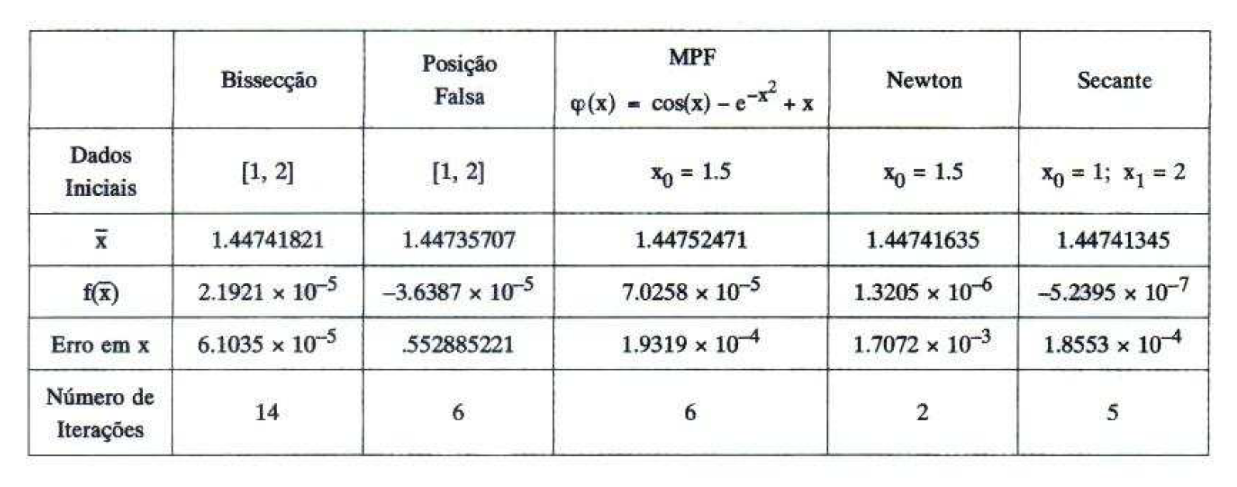

Método,Bissecção,Posição Falsa,MPF,Newton,Secante
Dados Iniciais,"[1, 2]","[1, 2]",x₀ = 1.5,x₀ = 1.5,x₀ = 1; x₁ = 2
x̄,1.447414 × 10⁰,1.447403 × 10⁰,1.447429 × 10⁰,1.447416 × 10⁰,1.447413 × 10⁰
f(x̄),8.07235443073262 × 10⁻⁸,-6.947674015087002 × 10⁻⁶,9.299652391228652 × 10⁻⁶,1.3204357450918858 × 10⁻⁶,-5.242249916104225 × 10⁻⁷
Erro em x,7.62939453125 × 10⁻⁶,5.526429 × 10⁻¹,2.5559631680271977 × 10⁻⁵,1.707153 × 10⁻³,1.855289 × 10⁻⁴
Número de Iterações,17,6,8,2,5
Operações,87,61,10,8,21
Decisões,35,20,10,4,1
Avaliações de f,18,28,9,5,11
Tempo de Execução (s),3.790855407714844 × 10⁻⁵,1.33514404296875 × 10⁻⁵,7.62939453125 × 10⁻⁶,5.9604644775390625 × 10⁻⁶,7.867813110351562 × 10⁻⁶
Tempo de Execução por Iteração (s),2.229914945714614 × 10⁻⁶,2.2252400716145835 × 10⁻⁶,9.5367431640625 × 10⁻⁷,2.9802322387695312 × 10⁻⁶,1.5735626220703124 × 10⁻⁶


In [8]:
def f18(x):
    return math.exp(-x**2) - math.cos(x)

def df18(x):
    return -2 * x * math.exp(-x**2) + math.sin(x)

def phi18(x):
    return math.cos(x) - math.exp(-x**2) + x

eps = 1e-5
a_inicial = 1
b_inicial = 2

display(Image(filename='img/EX18.png'))

exec_example(
    f18,
    (a_inicial, b_inicial, eps),
    (a_inicial, b_inicial, eps, eps),
    (phi18, 1.5, eps, eps),
    (df18, 1.5, eps, eps),
    (1, 2, eps, eps)
)

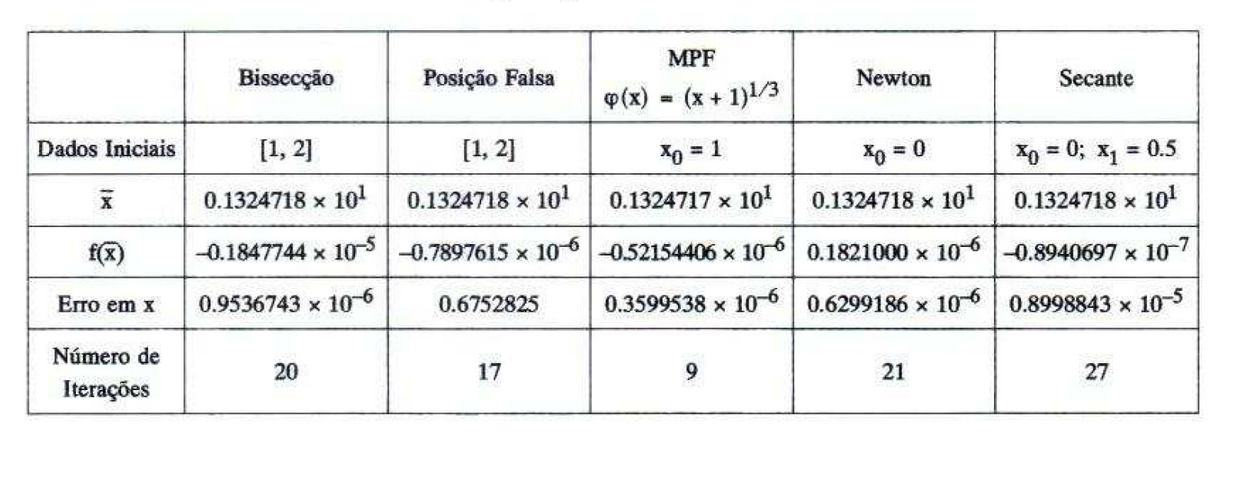

Método,Bissecção,Posição Falsa,MPF,Newton,Secante
Dados Iniciais,"[1, 2]","[1, 2]",x₀ = 1,x₀ = 0,x₀ = 0; x₁ = 0.5
x̄,1.324738 × 10⁰,1.324704 × 10⁰,1.324702 × 10⁰,1.324719 × 10⁰,1.324706 × 10⁰
f(x̄),8.355243838309434 × 10⁻⁵,-6.047499488426311 × 10⁻⁵,-6.912325943808639 × 10⁻⁵,3.5454928626332816 × 10⁻⁶,-5.0862824548802976 × 10⁻⁵
Erro em x,6.103515625 × 10⁻⁵,6.753155 × 10⁻¹,6.912325943853048 × 10⁻⁵,9.443058 × 10⁻⁴,9.282446 × 10⁻⁴
Número de Iterações,14,11,6,20,25
Operações,72,106,8,62,101
Decisões,29,35,8,22,1
Avaliações de f,15,48,7,41,51
Tempo de Execução (s),5.14984130859375 × 10⁻⁵,1.71661376953125 × 10⁻⁵,6.4373016357421875 × 10⁻⁶,1.4543533325195312 × 10⁻⁵,1.5735626220703125 × 10⁻⁵
Tempo de Execução por Iteração (s),3.6784580775669643 × 10⁻⁶,1.5605579723011365 × 10⁻⁶,1.0728836059570312 × 10⁻⁶,7.271766662597656 × 10⁻⁷,6.29425048828125 × 10⁻⁷


In [9]:
def f19(x):
    return x**3 - x - 1

def phi19(x):
    return (x + 1)**(1/3)

def df19(x):
    return 3*x**2 - 1

eps = 1e-4
a_inicial = 1
b_inicial = 2

display(Image(filename='img/EX19.png'))

exec_example(
    f19,
    (a_inicial, b_inicial, eps),
    (a_inicial, b_inicial, eps, eps),
    (phi19, 1, eps, eps),
    (df19, 0, eps, eps),
    (0, 0.5, eps, eps)
)

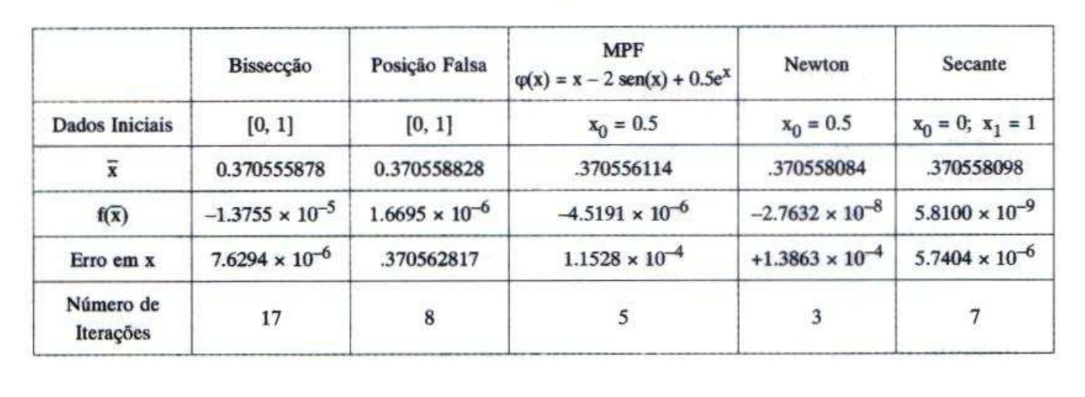

Método,Bissecção,Posição Falsa,MPF,Newton,Secante
Dados Iniciais,"[0, 1]","[0, 1]",x₀ = 0.5,x₀ = 0.5,x₀ = 0; x₁ = 1
x̄,3.705750 × 10⁻¹,3.705885 × 10⁻¹,3.705723 × 10⁻¹,3.705581 × 10⁻¹,3.705638 × 10⁻¹
f(x̄),3.8428753397212745 × 10⁻⁵,6.937075841406681 × 10⁻⁵,3.2287944045306105 × 10⁻⁵,-2.7834957228023427 × 10⁻⁸,1.3093633581817699 × 10⁻⁵
Erro em x,6.103515625 × 10⁻⁵,3.707542 × 10⁻¹,1.152792 × 10⁻⁴,1.386326 × 10⁻⁴,6.385850 × 10⁻⁴
Número de Iterações,14,5,4,3,6
Operações,72,52,6,11,25
Decisões,29,17,6,5,1
Avaliações de f,15,24,5,7,13
Tempo de Execução (s),5.173683166503906 × 10⁻⁵,1.1205673217773438 × 10⁻⁵,6.198883056640625 × 10⁻⁶,5.4836273193359375 × 10⁻⁶,6.67572021484375 × 10⁻⁶
Tempo de Execução por Iteração (s),3.6954879760742188 × 10⁻⁶,2.2411346435546876 × 10⁻⁶,1.5497207641601562 × 10⁻⁶,1.8278757731119792 × 10⁻⁶,1.1126200358072917 × 10⁻⁶


In [10]:
def f20(x):
    return 4*math.sin(x) - math.exp(x)

def phi20(x):
    return x - 2*math.sin(x) + 0.5*math.exp(x)

def df20(x):
    return 4*math.cos(x) - math.exp(x)

eps = 1e-4
a_inicial = 0
b_inicial = 1

display(Image(filename='img/EX20.png'))

exec_example(
    f20,
    (a_inicial, b_inicial, eps),
    (a_inicial, b_inicial, eps, eps),
    (phi20, 0.5, eps, eps),
    (df20, 0.5, eps, eps),
    (0, 1, eps, eps)
)

In [ ]:
def f21(x):
    return x*math.log(x) -1

def phi21(x):
    return x - 1.3*(x*math.log(x)-1)

def df21(x):
    return math.log(x) + 1 - 1.3*(math.log(x) + 1) 

eps1 = eps2 = 1e-7
a_inicial = 2
b_inicial = 3

display(Image(filename='img/EX21.png'))

exec_example(
    f21,
    (a_inicial, b_inicial, eps1),
    (a_inicial, b_inicial, eps1, eps2),
    (phi21, 2.5, eps1, eps2),
    (df21, 2.5, eps1, eps2),
    (2.3, 2.7, eps1, eps2)
)